# Part I - (Dataset Exploration Title)
## by Zadock Mainda

## Introduction

This dataset describes 81 variables of 113,937 loans taken at a credit facility between Nov 2005 and Mar 2014. Since it will be impossible to investigate each of the 81 variables in this project, we are going to curate a short list of variables to investigate each oother ..... ****** ******  

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [ ]:

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

In [199]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [200]:
#Read dataset into a df using pandas 

LoanData = pd.read_csv('prosperLoanData.csv')

#### Structure of the dataset

Retrieve a sample of 5 rows so that we can have a broad overview of the dataframe

In [201]:
LoanData.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
49785,E9BD3597909585477070BCA,1079983,2014-01-03 12:06:14.777000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-12.87,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
46100,D87035665076303079E6C18,691260,2012-12-28 08:43:42.090000000,NaN,12,Completed,2014-01-04 00:00:00,0.20977,0.1323,0.1223,...,-55.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,154
81240,7C9633657218948730D15BF,30144,2006-08-09 09:23:00.997000000,B,36,Completed,2008-05-07 00:00:00,0.15904,0.1519,0.1444,...,-45.37,0.0,0.0,0.0,0.0,1.0,0,0,0.0,124
16239,1B693365889353730C81FBA,24791,2006-07-15 07:34:57.130000000,E,36,Completed,2008-01-29 00:00:00,0.28771,0.2800,0.2750,...,-14.23,0.0,0.0,0.0,0.0,1.0,0,0,0.0,8
50602,9E183590694675316C4FC35,926574,2013-09-26 08:13:30.650000000,NaN,36,Current,NaN,0.33973,0.2999,0.2899,...,-9.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [202]:
# dataframe dimensions

LoanData.shape

(113937, 81)

According to the shape attribute, the dataframe is made up of 113,937 rows and 81 columns.

### The main features of interest in this dataset are listed below:

We are going to use the columns below to investigate how various factors affect loan payments. 

In [203]:
selectedCols = [
    'ListingKey', 'ListingCreationDate','CreditGrade', 
    'Term','LoanStatus', 'BorrowerRate', 'ProsperScore', 
    'EmploymentStatus', 'EmploymentStatusDuration', 
    'IsBorrowerHomeowner', 'CurrentDelinquencies',
    'PublicRecordsLast10Years', 'DebtToIncomeRatio', 'IncomeRange', 
    'LoanOriginalAmount', 'MonthlyLoanPayment','Recommendations'
     ] 

Create a new dataframe that comprises only of the columns indicated above: 

In [204]:
loan_new = LoanData[selectedCols]

## Assessing Data

### Quality issues


1. ListingCreationDate is a string 
2. Duplicate descriptor in the Employment status *('Employed' & 'Full-time' )*
3. IncomeRange is a string instead of Categorical datatype
4. CreditGrade is a String object 


In [205]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   ListingCreationDate       113937 non-null  object 
 2   CreditGrade               28953 non-null   object 
 3   Term                      113937 non-null  int64  
 4   LoanStatus                113937 non-null  object 
 5   BorrowerRate              113937 non-null  float64
 6   ProsperScore              84853 non-null   float64
 7   EmploymentStatus          111682 non-null  object 
 8   EmploymentStatusDuration  106312 non-null  float64
 9   IsBorrowerHomeowner       113937 non-null  bool   
 10  CurrentDelinquencies      113240 non-null  float64
 11  PublicRecordsLast10Years  113240 non-null  float64
 12  DebtToIncomeRatio         105383 non-null  float64
 13  IncomeRange               113937 non-null  o

Check for duplicated rows in the dataframe

In [206]:

loan_new.duplicated().sum()

0

There are no duplicates in the LoanData datframe

Create a custom function that returns unique items in a column. This will assist with reducing repetitive code while at the same time giving us a glimpse of how the specified columns are populated. 

In [290]:
# dataframe name (loan_new) is hardcoded in the function:

def entries(columnName):
    #param: name of column
    global loan_new
    df = loan_new
    return df[columnName].unique()

In [236]:
#List unique entries in the LoanStatus column

entries('LoanStatus')

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [209]:
#List unique entries in the Term column

entries('Term')

array([36, 60, 12], dtype=int64)

In [210]:
#List unique entries in the EmploymentStatus column

entries('EmploymentStatus')

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [211]:
#List unique entries in the IsBorrowerHomeowner column

entries('IsBorrowerHomeowner')

array([ True, False])

In [212]:
#List unique entries in the Recommendations column

entries('Recommendations')

array([ 0,  2,  1,  4,  3,  9,  5, 16, 39, 21,  7, 14,  8,  6, 24, 19, 18],
      dtype=int64)

In [213]:
#List unique entries in the IncomeRange column

entries('IncomeRange')

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [214]:
#List unique entries in the IncomeRange column

entries('CreditGrade')

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

## Cleaning

###### Make copies of the original data

In [215]:
loan_clean = loan_new.copy()

### Issue #1: ListingCreationDate is a string instead of datetime object 

#### Define:
* Change the datatype of ListingCreationDate from string to Datetime

#### Code

In [216]:
#Change datatype to Datetime from string

loan_clean['ListingCreationDate']= pd.to_datetime(loan_clean['ListingCreationDate'])

#### Test

In [217]:
#Confirm that ListingCreationDate is of datetime datatype

assert loan_clean['ListingCreationDate'].dtype == 'datetime64[ns]'

### Issue #2: Duplicate descriptor in the Employment status ('Employed' & 'Full-time' )

#### Define
* Rename *Full-time* status to *Employed*

#### Code 

In [218]:
loan_clean.loc[(loan_clean.EmploymentStatus == 'Full-time' ), 'EmploymentStatus'] = 'Employed'

#### Test

In [219]:
#Confirm that Full-time is not in the EmploymentStatus column

assert 'Full-time' not in loan_clean.EmploymentStatus.unique()

## Issue #3: IncomeRange is a string

#### Define
* Change IncomeRange from String to Categorical datatype

#### Code
Let's confirm the IncomeRange's datatype

In [223]:
loan_clean.IncomeRange.dtype

dtype('O')

next step is retrieving a list of unique objects from the column

In [224]:
loan_clean.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

Since we are going to use these ranges to categorize some of our operations, we are going to assume that each occurence of `Not displayed` and `Not employed` in the column implies that the loan applicant did not have a source of income therefore should be categorized under `'$0'`

In [233]:
# loc: select rows based on multiple conditions
# select rows with 'Not Employed' or 'Not displayed'
#change values to '$0'

loan_clean.loc[(loan_clean.IncomeRange == 'Not employed') | (loan_clean.IncomeRange == 'Not displayed'), 'IncomeRange'] = '$0'

In [235]:
# list unique items in the IncomeRange column

loan_clean.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', '$0', '$100,000+',
       '$75,000-99,999', '$1-24,999'], dtype=object)

We will order the income ranges from smallest to largest

In [241]:
#income ranges in a list 

ordered_ranges = [
                  '$0',
                  '$1-24,999',
                  '$25,000-49,999',
                  '$50,000-74,999',
                  '$75,000-99,999',
                  '$100,000+'
                 ]

Change the column's  datatype

In [254]:
#categorical method takes in a list-like of values and sorted categories list

loan_clean['IncomeRange'] = pd.Categorical(loan_clean['IncomeRange'], ordered_ranges, ordered=True)

confirm if indeed unique from the IncomeRange column are sorted per our ordered_ranges list

In [255]:
loan_clean['IncomeRange'].unique().sort_values()

['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
Categories (6, object): ['$0' < '$1-24,999' < '$25,000-49,999' < '$50,000-74,999' < '$75,000-99,999' < '$100,000+']

As we can see from the above, income ranges are sorted

In [281]:
loan_clean['IncomeRange'].dtype

CategoricalDtype(categories=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                  '$75,000-99,999', '$100,000+'],
, ordered=True)

#### Test

In [264]:
#confirm that datatype is category

assert loan_clean['IncomeRange'].dtype == 'category'

## Issue #4: CreditGrade is a String object

#### Define
* Change datatype to categorical 

#### Code

In [276]:
#Unique entries in the CreditGrade column

loan_clean['CreditGrade'].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

We will sort the credit ratings manually from the highest to the lowest

In [282]:
sorted_credits = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

In [283]:
loan_clean['CreditGrade'] = pd.Categorical(loan_clean['CreditGrade'], sorted_credits, ordered=True)

In [285]:
#Confirm the sorting order of entries in the CreditGrade column

loan_clean['CreditGrade'].unique().sort_values()

['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA', NaN]
Categories (8, object): ['NC' < 'HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

#### Test

In [294]:
#assert data type is category

assert loan_clean['CreditGrade'].dtype == 'category'

###### Save clean dataset to CSV

In [481]:
loan_clean.to_csv('loan_clean.csv', index=False)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [295]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   ListingCreationDate       113937 non-null  datetime64[ns]
 2   CreditGrade               28953 non-null   category      
 3   Term                      113937 non-null  int64         
 4   LoanStatus                113937 non-null  object        
 5   BorrowerRate              113937 non-null  float64       
 6   ProsperScore              84853 non-null   float64       
 7   EmploymentStatus          111682 non-null  object        
 8   EmploymentStatusDuration  106312 non-null  float64       
 9   IsBorrowerHomeowner       113937 non-null  bool          
 10  CurrentDelinquencies      113240 non-null  float64       
 11  PublicRecordsLast10Years  113240 non-null  float64       
 12  De

Since plotting 113,937 rows is going to result in overplotting in some of our visualizations, we are going to pick a random sample of 5,000 rows from the loan_clean dataframe to use in our plots.

In [418]:
#select a random sample of 5,000 rows 

np.random.seed(1)
df = loan_clean.sample(5000)

#### Question #1: What are 

In [422]:
#Function to assist with plotting loan_clean barcharts 

def draw_bar(colname):
    output_bar = sb.countplot(y=loan_clean[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar

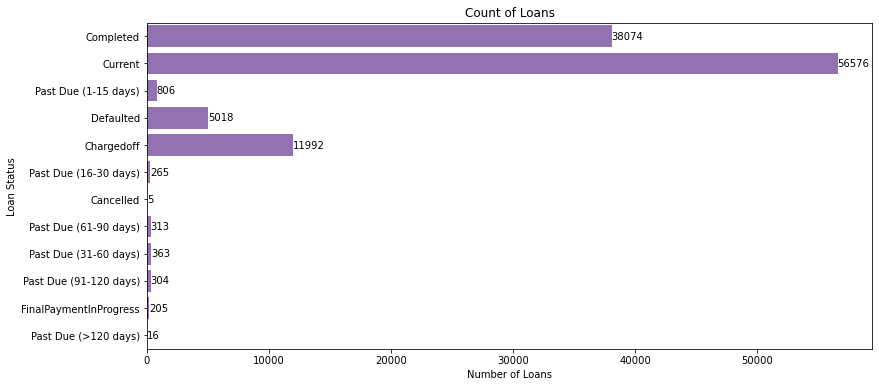

In [423]:

plt.figure(figsize = (13,6))

draw_bar('LoanStatus')

plt.xlabel('Number of Loans')
plt.ylabel('Loan Status')
plt.title('Count of Loans');



#### Question #2:

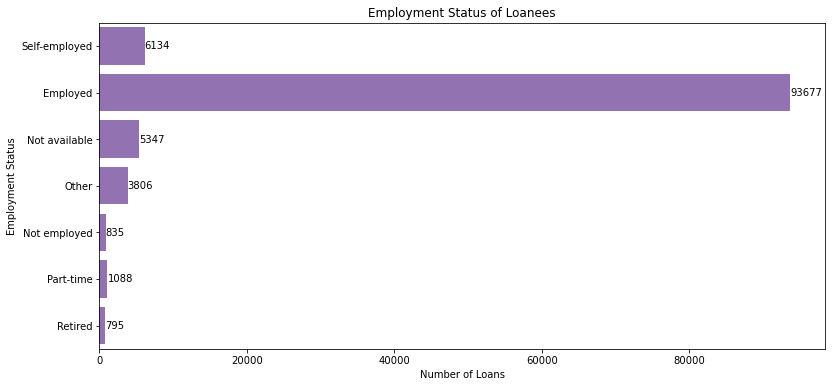

In [424]:
plt.figure(figsize = (13,6))

draw_bar('EmploymentStatus')

plt.xlabel('Number of Loans')
plt.ylabel('Employment Status')
plt.title('Employment Status of Loanees');

#### Question #3:

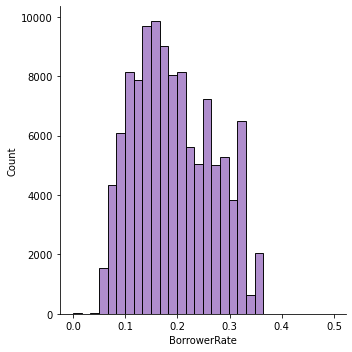

In [473]:

sb.displot(loan_clean['BorrowerRate'], bins=30, color=sb.color_palette()[4]);


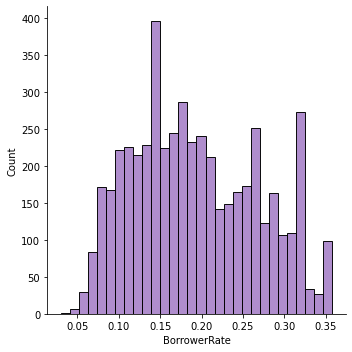

In [474]:
sb.displot(df['BorrowerRate'], bins=30, color=sb.color_palette()[4]);


#### Question #4:

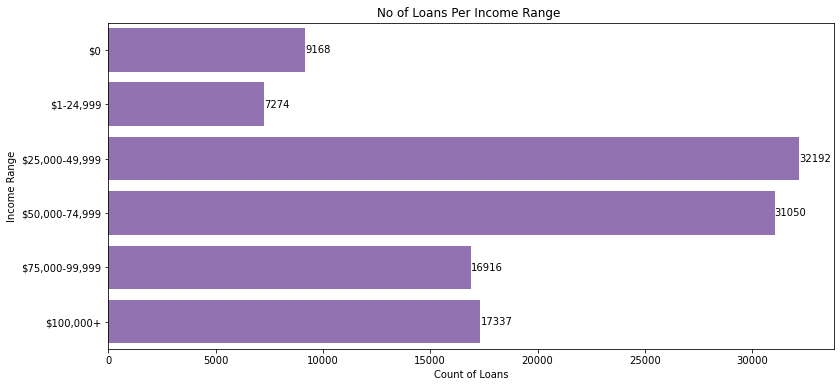

In [400]:
plt.figure(figsize = (13,6))

draw_bar('IncomeRange')

plt.xlabel(' of Loans')
plt.ylabel('Income Range')
plt.title('No of Loans Per Income Range ');

#### Question #5: What is the distribution of the DebtToIncomeRatio in the dataset?

In [437]:
#investigate summary stats of the DebtToIncomeRation column
loan_clean.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

Since the mean of this column is 0.275 , this indicates that most values lie between 0 and 1, which will serve as the limits of our X axis.  

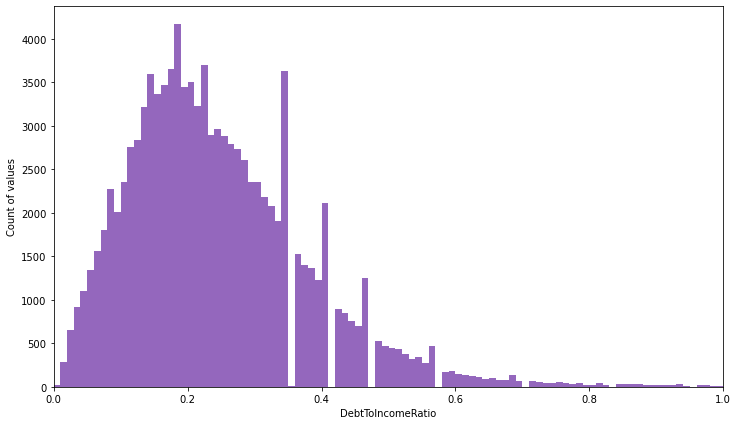

In [472]:
plt.figure(figsize = (12,7))

bins = np.arange(0, loan_clean.DebtToIncomeRatio.max()+0.01, 0.01)
plt.hist(data = loan_clean, x= 'DebtToIncomeRatio', bins=bins, color=sb.color_palette()[4]) 
plt.ylabel('Count of values')
plt.xlabel('DebtToIncomeRatio')
plt.xlim(xmin=0, xmax=1);

#### Question 6.  Loan Listing Creation trends across the year

We'll create a new column and populate it with month names, then convert it into a categorial data type so that we can be able to sort based on month name. 

In [487]:
#Create a month column

loan_clean['month'] = pd.to_datetime(loan_clean['ListingCreationDate']).dt.strftime('%b')

In [485]:
#month names

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [488]:
#change datatype to categorical

loan_clean['month'] = pd.Categorical(loan_clean['month'], categories=months, ordered=True)

Let's confirm if the conversion was successful

In [490]:
loan_clean['month'].unique()

['Aug', 'Feb', 'Jan', 'Oct', 'Sep', ..., 'May', 'Jul', 'Nov', 'Jun', 'Mar']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

In [491]:
loan_clean['ListingKey'].groupby(loan_clean['month']).count()

month
Jan    11214
Feb    10124
Mar     8032
Apr     7661
May     8641
Jun     8672
Jul     9506
Aug     9202
Sep    10074
Oct    10539
Nov     9952
Dec    10320
Name: ListingKey, dtype: int64

Plot a bar chart to visualize the findings

In [494]:
#Slight modification to function to plot against x axis

def draw_bar(colname):
    output_bar = sb.countplot(x=loan_clean[colname], color=sb.color_palette()[4])
    for bar in output_bar.containers:
        output_bar.bar_label(bar)
    return output_bar

TypeError: 'str' object is not callable

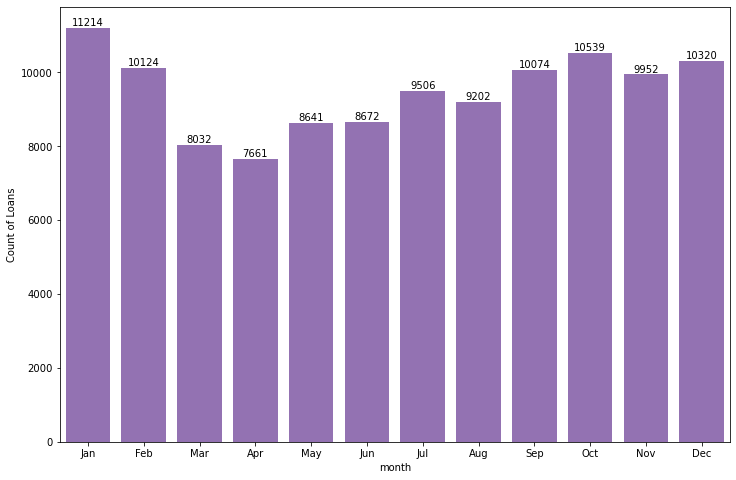

In [501]:
plt.figure(figsize = (12,8))

draw_bar('month')
plt.ylabel('Count of Loans')
plt.title('Count of ListingCreationdate per month')
;

In [293]:
#Create a year column

LoanData['year'] = pd.to_datetime(LoanData.ListingCreationDate).dt.strftime('%Y')



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<AxesSubplot:xlabel='EmploymentStatusDuration', ylabel='CurrentDelinquencies'>

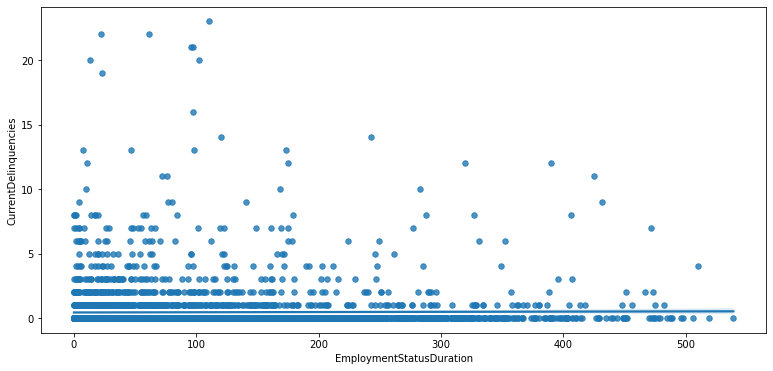

In [434]:
plt.figure(figsize = (13,6))


sb.regplot(
    data=df, x='EmploymentStatusDuration', y='CurrentDelinquencies',
    x_jitter=0.04 
    ,scatter_kws={"s": 30}
          )

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

